In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

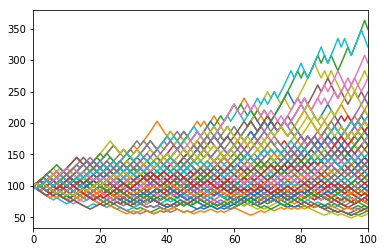

In [2]:
# Binomial Lattice
expected_growth_rate = np.random.random()
volatility = np.random.random()

v = 0.15  # expected_growth_rate
sigma = 0.30  # volatility
t = 1 / 52

def binomial_simulation(v, sigma, t, initial_price, periods):
    p = 0.5 + 0.5 * (v / sigma) * np.sqrt(t)
    u = np.exp(sigma * np.sqrt(t))
    d = 1 / u
    path = np.random.choice(2, size=100, p=[1 - p, p])
    
    stock_prices = [initial_price]
    current_price = initial_price
    for step in path:
        new_price = (current_price * u) if step == 1 else (current_price * d)
        stock_prices.append(new_price)
        current_price = new_price
    return stock_prices

stocks = pd.DataFrame({f"Stock {i}": binomial_simulation(v, sigma, t, 100, 100) for i in range(1, 101)})
stocks.plot(legend=False)

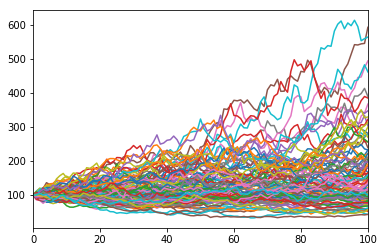

In [3]:
# Ito Process
expected_return = np.random.random()
variance = np.random.random()

v = 0.15  # np.log(expected_return)
sigma = 0.40  # np.sqrt(variance)
t = 1 / 52

def ito_simulation(v, sigma, t, initial_price, periods):
    epsilons = np.random.normal(loc=0, scale=1, size=periods)
    
    stock_prices = [initial_price]
    current_price = initial_price
    for epsilon in epsilons:
        new_price = np.exp(v * t + sigma * epsilon * np.sqrt(t)) * current_price
        stock_prices.append(new_price)
        current_price = new_price
    return stock_prices

stocks = pd.DataFrame({f"Stock {i}": ito_simulation(v, sigma, t, 100, 100) for i in range(1, 101)})
stocks.plot(legend=False)